In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/H-1B_Disclosure_Data_FY2019 (2).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,53,54,58,73,79,88,90,94,100,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,164,166,169,171,172,173,174,175,176,177,178,185,187,190,192,193,194,195,196,197,198,199,206,208,211,213,214,215,216,217,218,219,220,223,225,227,229,232,234,236,237,238,239,240,244,246,248,250,253,258) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# understanding the data

In [4]:
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-2016,30-04-2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
31364,I-200-19077-004715,CERTIFIED-WITHDRAWN,20-03-2019 11:36,26-03-2019 22:02,26-03-2019 22:02,H-1B,BUSINESS ANALYST,13-1081,LOGISTICIANS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
31365,I-200-19078-505953,CERTIFIED,20-03-2019 12:24,26-03-2019 22:02,NaN,H-1B,OPERATIONS ASSOCIATE,13-1081,LOGISTICIANS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
31366,I-200-19071-168425,CERTIFIED,20-03-2019 12:26,26-03-2019 22:02,NaN,H-1B,SUPPLY CHAIN ENGINEER,13-1081,LOGISTICS ENGINEERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF EMPLOYMENT
31367,I-200-19079-451203,CERTIFIED,20-03-2019 12:37,26-03-2019 22:02,NaN,H-1B,LOGISTICS ANALYST - SUPPLY CHAIN PLANNING,13-1081,LOGISTICIANS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
31368,I-200-19071-548787,CERTIFIED-WITHDRAWN,20-03-2019 13:25,26-03-2019 22:03,26-03-2019 22:03,H-1B,DISTRIBUTION ANALYST,13-1081,LOGISTICIANS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(31369, 260)

In [7]:
data.describe()

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE_EXT,NAICS_CODE,AGENT_ATTORNEY_PHONE,...,WORKSITE_WORKERS_10,SECONDARY_ENTITY_BUSINESS_NAME_10,WORKSITE_POSTAL_CODE_10,WAGE_RATE_OF_PAY_FROM_10,WAGE_RATE_OF_PAY_TO_10,PREVAILING_WAGE_10,PW_TRACKING_NUMBER_10,PW_OES_YEAR_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10
count,31368.000000,31369.000000,31369.000000,31369.000000,31369.000000,31369.000000,31369.000000,7.380000e+02,31368.000000,2.745100e+04,...,2.0,0.0,2.000000,2.000000,1.0,2.000000,0.0,1.0,1.0,1.0
mean,1.506344,0.611336,0.289904,0.141222,0.009564,0.254997,0.196245,4.465358e+04,409817.720161,6.606372e+09,...,1.0,NaN,60428.500000,146509.500000,145000.0,133862.000000,NaN,2018.0,2018.0,2018.0
std,3.889804,2.796869,0.769410,0.628542,0.180955,0.997659,0.680688,4.555434e+05,203068.768649,2.963472e+10,...,0.0,NaN,24343.565156,20337.098134,NaN,2450.832104,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1111.000000,8.321441e+06,...,1.0,NaN,43215.000000,132129.000000,145000.0,132129.000000,NaN,2018.0,2018.0,2018.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,325612.000000,3.108203e+09,...,1.0,NaN,51821.750000,139319.250000,145000.0,132995.500000,NaN,2018.0,2018.0,2018.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115000e+02,517212.000000,4.159861e+09,...,1.0,NaN,60428.500000,146509.500000,145000.0,133862.000000,NaN,2018.0,2018.0,2018.0
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.163750e+03,541511.000000,7.032263e+09,...,1.0,NaN,69035.250000,153699.750000,145000.0,134728.500000,NaN,2018.0,2018.0,2018.0
max,110.000000,75.000000,30.000000,20.000000,5.000000,50.000000,15.000000,9.363774e+06,928120.000000,9.720730e+11,...,1.0,NaN,77642.000000,160890.000000,145000.0,135595.000000,NaN,2018.0,2018.0,2018.0


In [8]:
data.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION',
       ...
       'PW_OTHER_SOURCE_10', 'PW_NON-OES_YEAR_10', 'PW_SURVEY_PUBLISHER_10',
       'PW_SURVEY_NAME_10', 'H-1B_DEPENDENT', 'WILLFUL_VIOLATOR',
       'SUPPORT_H1B', 'STATUTORY_BASIS', 'MASTERS_EXEMPTION',
       'PUBLIC_DISCLOSURE'],
      dtype='object', length=260)

In [9]:
data.nunique()

CASE_NUMBER           31369
CASE_STATUS               4
CASE_SUBMITTED        27130
DECISION_DATE          2624
ORIGINAL_CERT_DATE      923
                      ...  
WILLFUL_VIOLATOR          2
SUPPORT_H1B               2
STATUTORY_BASIS           3
MASTERS_EXEMPTION         2
PUBLIC_DISCLOSURE         3
Length: 260, dtype: int64

In [10]:
data['CASE_STATUS'].unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [ ]:
# cleaning data

In [11]:
data.isnull().sum()

CASE_NUMBER               0
CASE_STATUS               0
CASE_SUBMITTED            0
DECISION_DATE             0
ORIGINAL_CERT_DATE    29121
                      ...  
WILLFUL_VIOLATOR       3969
SUPPORT_H1B           28560
STATUTORY_BASIS       28950
MASTERS_EXEMPTION     31321
PUBLIC_DISCLOSURE      1582
Length: 260, dtype: int64

In [ ]:
# relationship analysis

In [12]:
data.SOC_CODE.isnull().describe()

count     31369
unique        1
top       False
freq      31369
Name: SOC_CODE, dtype: object

In [13]:
data.SOC_CODE.nunique()


53

In [14]:
data.CASE_STATUS.isnull().sum()

0

In [15]:
data.WILLFUL_VIOLATOR.isnull().sum()


3969

In [16]:
data.WILLFUL_VIOLATOR.unique()


array(['N', nan, 'Y'], dtype=object)

In [17]:
data.WILLFUL_VIOLATOR.value_counts()

N    27397
Y        3
Name: WILLFUL_VIOLATOR, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


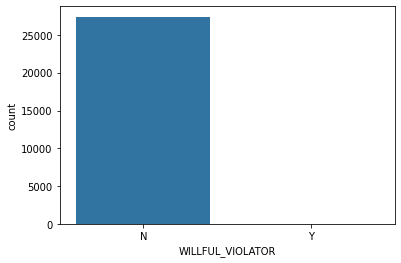

In [18]:
import seaborn as sns
sns.countplot(data.WILLFUL_VIOLATOR)

In [19]:
data = data[((data['CASE_STATUS'].str.upper() == 'CERTIFIED') | \
                               (data['CASE_STATUS'].str.upper() == 'DENIED')) & \
                              (data['VISA_CLASS'].str.upper() == 'H-1B')]  
    

In [20]:
data = data[data.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']
print('There are {} records.'.format(data.shape[0]))

There are 24339 records.


In [21]:
def jobClassifier(SOC_CODE, SOC_MAP):
    soc_map = SOC_MAP
    soc = str(SOC_CODE).split('-')[0]        
    return soc_map.get(soc,'OTHER')

([0, 1], <a list of 2 Text major ticklabel objects>)

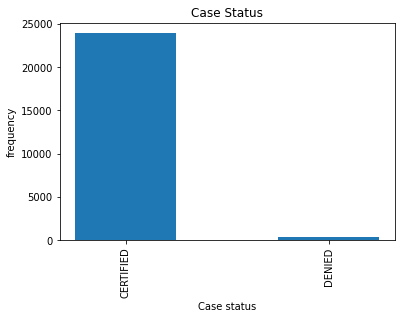

In [22]:
data.CASE_STATUS.value_counts()
plt.bar(data['CASE_STATUS'].value_counts().index, data['CASE_STATUS'].value_counts(), width= 0.5, bottom=None , align='center', data=data)
plt.title('Case Status')
plt.xlabel('Case status')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')


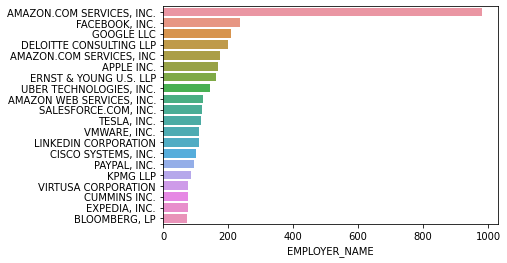

In [23]:
data['EMPLOYER_NAME'].value_counts()
sns.barplot(x = data['EMPLOYER_NAME'].value_counts()[:20], y = data['EMPLOYER_NAME'].value_counts().index[:20])


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

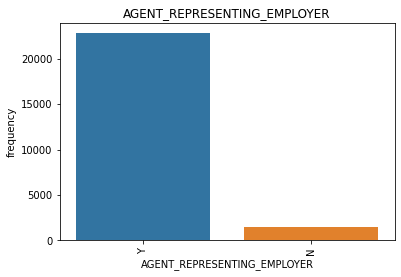

In [24]:
data['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20]
sns.barplot(x = data['AGENT_REPRESENTING_EMPLOYER'].value_counts().index[:20], y = data['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20])
plt.title('AGENT_REPRESENTING_EMPLOYER')
plt.xlabel('AGENT_REPRESENTING_EMPLOYER')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')


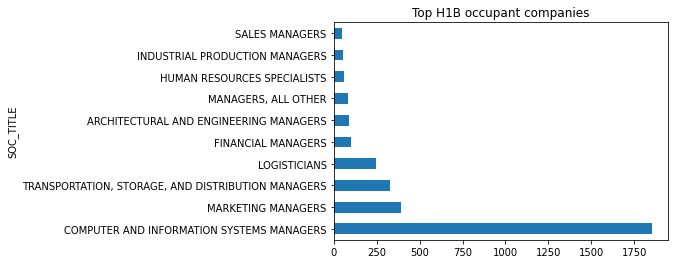

In [25]:
top_occup = data.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_occup_H1B_visa = data.loc[data.EMPLOYER_NAME.isin(top_occup)]
top_occup_H1B_visa.groupby('SOC_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='Top H1B occupant companies')


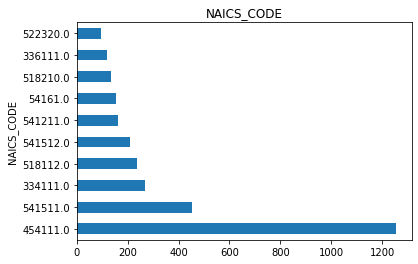

In [26]:
top_NAICS_CODE = data.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_NAICS_CODE_H1B_visa = data.loc[data.EMPLOYER_NAME.isin(top_NAICS_CODE)]
top_NAICS_CODE_H1B_visa.groupby('NAICS_CODE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='NAICS_CODE')

In [27]:
data.groupby(['TOTAL_WORKER_POSITIONS','WAGE_UNIT_OF_PAY_1']).describe()['PREVAILING_WAGE_1']


count           mean  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                           
1.0                    Bi-Weekly               4.0    3778.500000   
                       Hour                 1454.0     968.468088   
                       Month                  27.0   39250.755926   
                       Week                    3.0    1136.006667   
                       Year                21464.0  118811.345179   
2.0                    Hour                   10.0   12144.672000   
                       Year                  129.0  131516.232558   
3.0                    Hour                    3.0      44.380000   
                       Year                  217.0  118421.202765   
4.0                    Year                    9.0   98966.111111   
5.0                    Hour                    2.0      27.385000   
                       Year                  101.0  138918.653465   
6.0                    Year                   13.0  100644.769231   
7.0                    Year                    1.0   68224.000000   
10.0                   Hour                   16.0      55.465625   
                       Year                  277.0  137210.444043   
12.0                   Year                   13.0  167613.538462   
15.0                   Year                   64.0  128734.890625   
20.0                   Year                   91.0  156810.384615   
24.0                   Year                    3.0  131367.000000   
25.0                   Year                  119.0  142071.168067   
30.0                   Year                   47.0  154963.276596   
50.0                   Year                   52.0  155606.307692   
75.0                   Year                   24.0  140003.083333   
100.0                  Year                    1.0  145267.000000   
110.0                  Year                    1.0  212181.000000   

                                                    std        min  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                            
1.0                    Bi-Weekly            1598.809036    2500.00   
                       Hour                 9299.724436      10.42   
                       Month               49335.549565      15.23   
                       Week                 1083.408381      22.02   
                       Year                45223.793529      16.11   
2.0                    Hour                38268.950000      20.44   
                       Year                53378.710472   40019.00   
3.0                    Hour                    3.793191      40.00   
                       Year                29588.328118   43285.00   
4.0                    Year                37661.400178   44637.00   
5.0                    Hour                    3.698168      24.77   
                       Year                47867.707794   38501.00   
6.0                    Year                41465.242123   51043.00   
7.0                    Year                         NaN   68224.00   
10.0                   Hour                   16.601736      23.84   
                       Year                40883.809587   51043.00   
12.0                   Year                50386.441163   57512.00   
15.0                   Year                31960.419593   79747.00   
20.0                   Year                39393.122388   57470.00   
24.0                   Year                31191.398350   98342.00   
25.0                   Year                37137.070766   56222.00   
30.0                   Year                28974.503511   85758.00   
50.0                   Year                39105.740691   79914.00   
75.0                   Year                46691.732179   73632.00   
100.0                  Year                         NaN  145267.00   
110.0                  Year                         NaN  212181.00   

                                                   25%         50%  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                            
1.0        